## Model no 1

Target:
+ life_ladder  

Features:
+ log_gdp_per_capita
+ social_support

import libraries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [196]:
model_name = 'model_01'

function section

In [197]:
def adjusted_r2(y,y_pred, X):
    adjusted_r2 = 1 - ((1 - r2_score(y, y_pred)) * (len(X) - 1) / (len(X) - X.shape[1] - 1))
    return adjusted_r2 

In [198]:
df = pd.read_csv("../data/life_ladder_2005_2022_no1_gdp_sosupp.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        2166 non-null   object 
 1   year                2166 non-null   int64  
 2   life_ladder         2166 non-null   float64
 3   log_gdp_per_capita  2166 non-null   float64
 4   social_support      2166 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 84.7+ KB


Define features and Target:

In [200]:
features = df.columns.tolist()
features.remove('country_name')
features.remove('year')
features.remove('life_ladder')

X = df[features]
y = df['life_ladder']

In [201]:
X.columns

Index(['log_gdp_per_capita', 'social_support'], dtype='object')

In [202]:
print(X.shape, y.shape)

(2166, 2) (2166,)


Train-Test-Split:

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=123)

In [204]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1516, 2) (650, 2) (1516,) (650,)


In [205]:
X_train.describe()

,log_gdp_per_capita,social_support
count,1516.000000,1516.000000
mean,9.401402,0.812146
std,1.154152,0.119366
min,5.935000,0.291000
25%,8.520500,0.748000
50%,9.510000,0.836000
75%,10.366000,0.905000
max,11.664000,0.987000


Scaling with StandartScaler and MinMaxScaler  
we will use the scaled data for KNN and Linear Regression

In [206]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Scatterplot with scaled and non-scaled data, both features (correlation)

In [207]:
X_train_scaled.shape

(1516, 2)

In [208]:
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

In [209]:
X_train_scaled

array([[-0.55245081,  1.3061142 ],
       [-1.21722745, -2.49856841],
       [ 1.26593431,  1.4066785 ],
       ...,
       [ 1.01025099, -0.36995743],
       [-1.8412681 , -1.80299868],
       [-0.13729043,  0.13286406]])

<Axes: xlabel='log_gdp_per_capita', ylabel='social_support'>

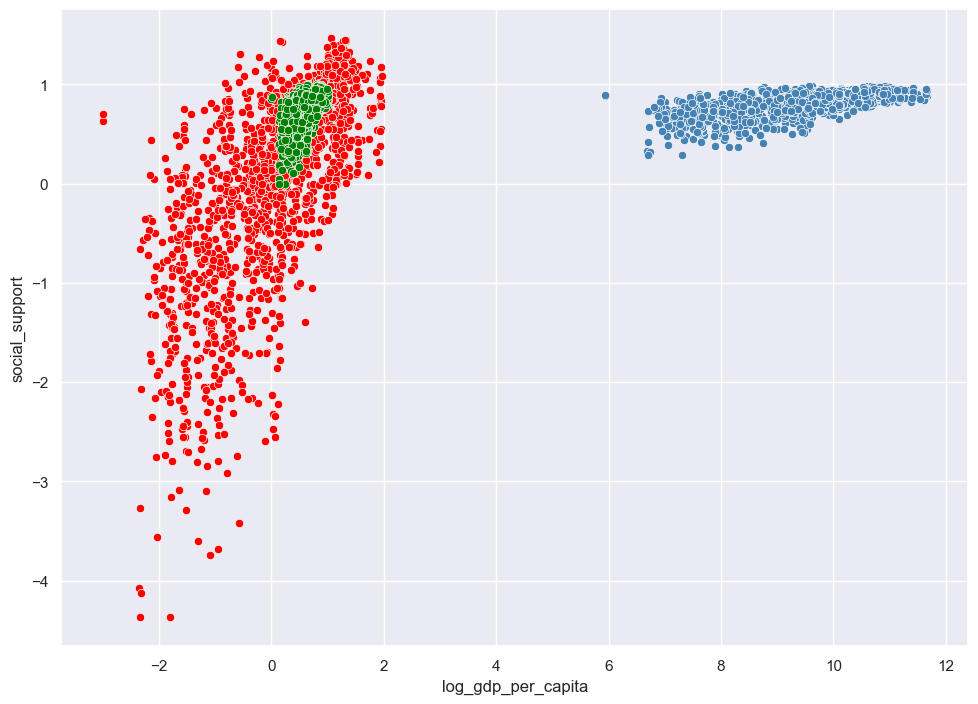

In [210]:
sns.scatterplot(x = X_train.log_gdp_per_capita, y = X_train.social_support, color = 'steelblue')
sns.scatterplot(x = X_train_scaled[:,0], y = X_train_scaled[:,1], color = 'red')
sns.scatterplot(x = X_train_normalized[:,0], y = X_train_normalized[:,1], color = 'green')

<Axes: xlabel='social_support', ylabel='life_ladder'>

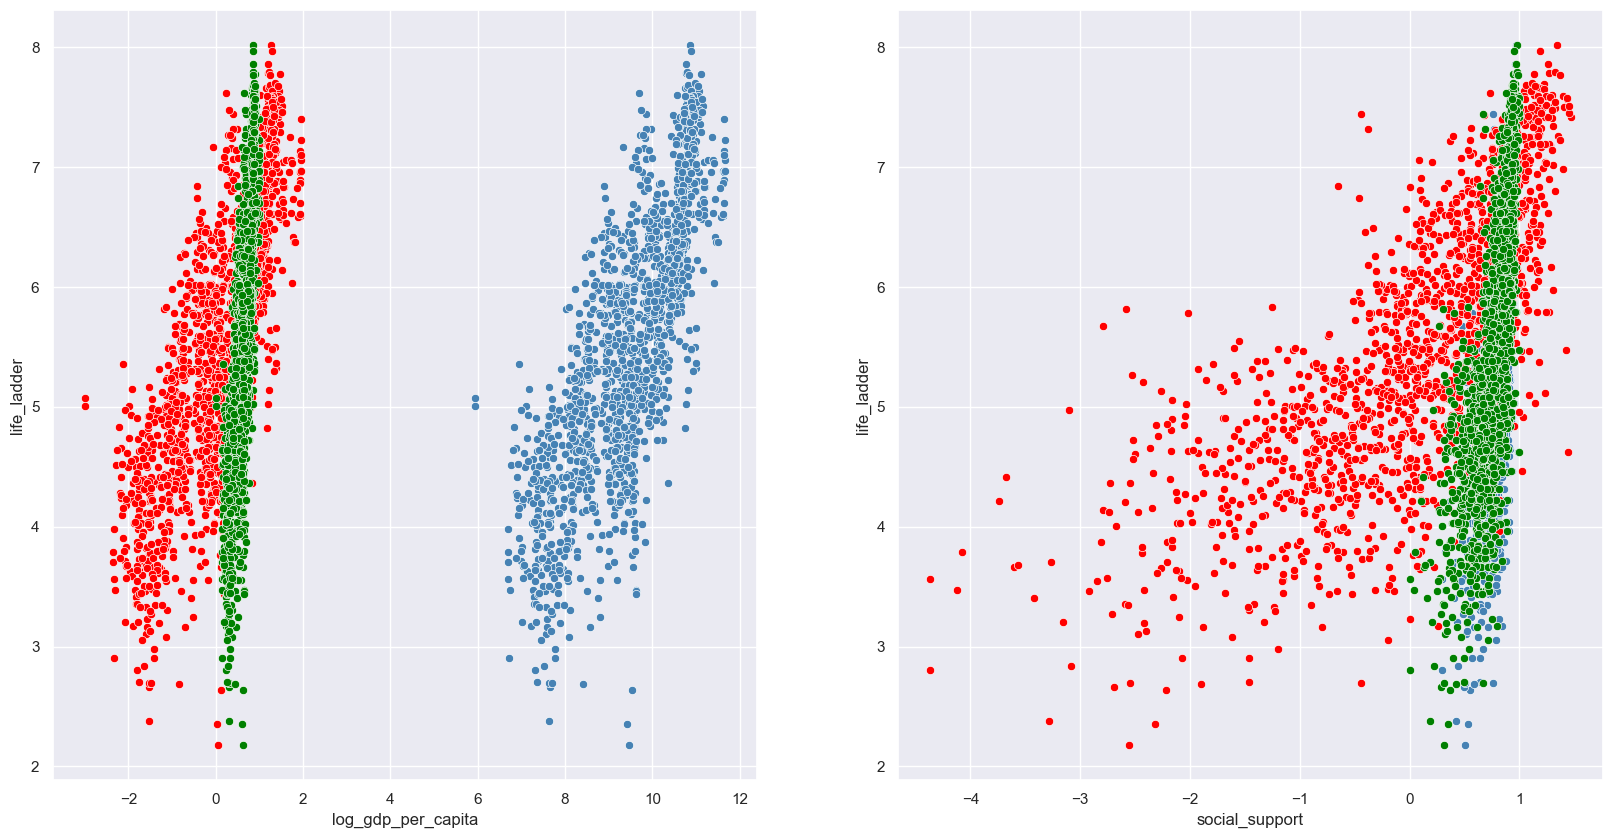

In [211]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(ax= ax[0], x = X_train.log_gdp_per_capita, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[0], x = X_train_scaled[:,0], y = y_train, color = 'red')
sns.scatterplot(ax= ax[0], x = X_train_normalized[:,0], y = y_train, color = 'green')
sns.scatterplot(ax= ax[1], x = X_train.social_support, y = y_train, color = 'steelblue')
sns.scatterplot(ax= ax[1], x = X_train_scaled[:,1], y = y_train, color = 'red')
sns.scatterplot(ax= ax[1], x = X_train_normalized[:,1], y = y_train, color = 'green')

Remember:   
**R2 should be as high as possible**  

(For example: an R2 of 0.917 will be interpreted as 91,70% of the variation in x can be explained by y (and vice versa). The rest (8,30%) is noise, which cannot refer to the variables.)  

**RMSE should be low as possible**

Linear Regression with variable polynomio

In [212]:
lin_reg_error_lst = []

for i in range(1,7):
    polynomial_features = PolynomialFeatures(degree=i, include_bias=False)
    x_poly_train = polynomial_features.fit_transform(X_train)
    x_poly_test = polynomial_features.transform(X_test)

    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(x_poly_train,y_train)

    y_pred_poly_test = lin_reg_poly.predict(x_poly_test)
    y_pred_poly_train = lin_reg_poly.predict(x_poly_train)

    rmse_test = mean_squared_error(y_test, y_pred_poly_test, squared=False).round(3)
    r2_test = adjusted_r2(y_test, y_pred_poly_test, X_test).round(3)
    rmse_train = mean_squared_error(y_train, y_pred_poly_train, squared=False).round(3)
    r2_train = adjusted_r2(y_train, y_pred_poly_train, X_train).round(3)
    
    delta_rmse = abs(rmse_train - rmse_test)
    delta_r2 = abs(r2_train - r2_test)
    
    model_descrip = model_name + '_lin_reg_' + str(i)
    lin_reg_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})

lin_reg_error_df = pd.DataFrame(lin_reg_error_lst)
lin_reg_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_01_lin_reg_1,0.634,0.679,0.643,0.671,0.009,0.008
5,model_01_lin_reg_6,0.572,0.739,0.583,0.730,0.011,0.009
3,model_01_lin_reg_4,0.593,0.719,0.606,0.708,0.013,0.011
2,model_01_lin_reg_3,0.594,0.719,0.607,0.707,0.013,0.012
1,model_01_lin_reg_2,0.601,0.712,0.614,0.700,0.013,0.012
4,model_01_lin_reg_5,0.577,0.734,0.611,0.704,0.034,0.030


lin_reg_sc = LinearRegression()
lin_reg_sc.fit(X_train_scaled,y_train)

y_pred_linreg_test = lin_reg_sc.predict(X_test_normalized)
y_pred_linreg_train = lin_reg_sc.predict(X_train_normalized)

rmse_test = mean_squared_error(y_test, y_pred_linreg_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_linreg_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_linreg_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_linreg_train, X_train).round(3)

delta_rmse = abs(rmse_train - rmse_test)
delta_r2 = abs(r2_train - r2_test)

lin_reg_error_lst.append({'model_name': model_name + '_lin_reg_scaled', 
                        'train_rmse': rmse_train, 
                        'train_r2':r2_train, 
                        'test_rmse': rmse_test, 
                        'test_r2':r2_test,
                        'delta_RMSE':delta_rmse,
                        'delta_R2':delta_r2})

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_64427/1132391817.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


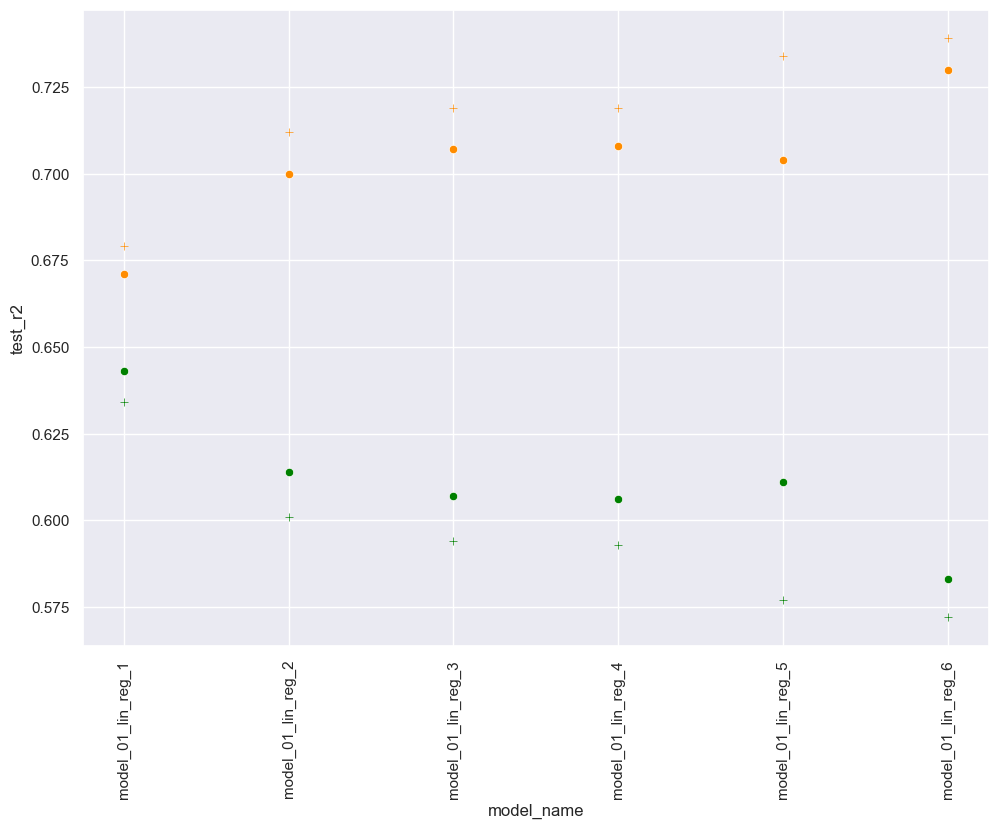

In [213]:
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g = sns.scatterplot(data = lin_reg_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show();

cross validation for scaled data

In [244]:
lin_reg_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    lin_reg_scaled = LinearRegression()
    cv_scores = cross_val_score(lin_reg_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_lin_reg_scaler_'  + str(count)
    lin_reg_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

lin_reg_cv_score_df = pd.DataFrame(lin_reg_cv_score_lst)
lin_reg_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
0,model_01_lin_reg_scaler_0,0.678
1,model_01_lin_reg_scaler_1,0.678
2,model_01_lin_reg_scaler_2,0.678


Scaling seems to be not important (why?)  
Best metrics with poly 1 and 6 (better r2, rmse)

---

### KNN Model 

+ with variable number of neighbors and variable distance metrics
+ unscaled!! - now with standart scaler

In [247]:
knn_error_lst = []
for metr in range(1,4):
    for neigh in np.arange(30,71,5): 
        knn = KNeighborsRegressor(n_neighbors=neigh, p=metr)
        knn.fit(X_train_scaled, y_train)

        y_pred_knn_test = knn.predict(X_test_scaled)
        y_pred_knn_train = knn.predict(X_train_scaled)
        rmse_test = mean_squared_error(y_test, y_pred_knn_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_knn_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_knn_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_knn_train, X_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_knn_'  + str(metr) + '_' + str(neigh)
        knn_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})
        
knn_error_df = pd.DataFrame(knn_error_lst)
knn_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
6,model_01_knn_1_60,0.557,0.753,0.567,0.744,0.010,0.009
4,model_01_knn_1_50,0.553,0.756,0.565,0.746,0.012,0.010
5,model_01_knn_1_55,0.554,0.755,0.566,0.745,0.012,0.010
7,model_01_knn_1_65,0.558,0.752,0.569,0.742,0.011,0.010
8,model_01_knn_1_70,0.560,0.750,0.572,0.740,0.012,0.010
26,model_01_knn_3_70,0.563,0.747,0.575,0.737,0.012,0.010
3,model_01_knn_1_45,0.551,0.758,0.564,0.747,0.013,0.011
13,model_01_knn_2_50,0.555,0.754,0.569,0.743,0.014,0.011
15,model_01_knn_2_60,0.558,0.751,0.571,0.740,0.013,0.011
16,model_01_knn_2_65,0.560,0.750,0.573,0.739,0.013,0.011


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_64427/2214502480.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


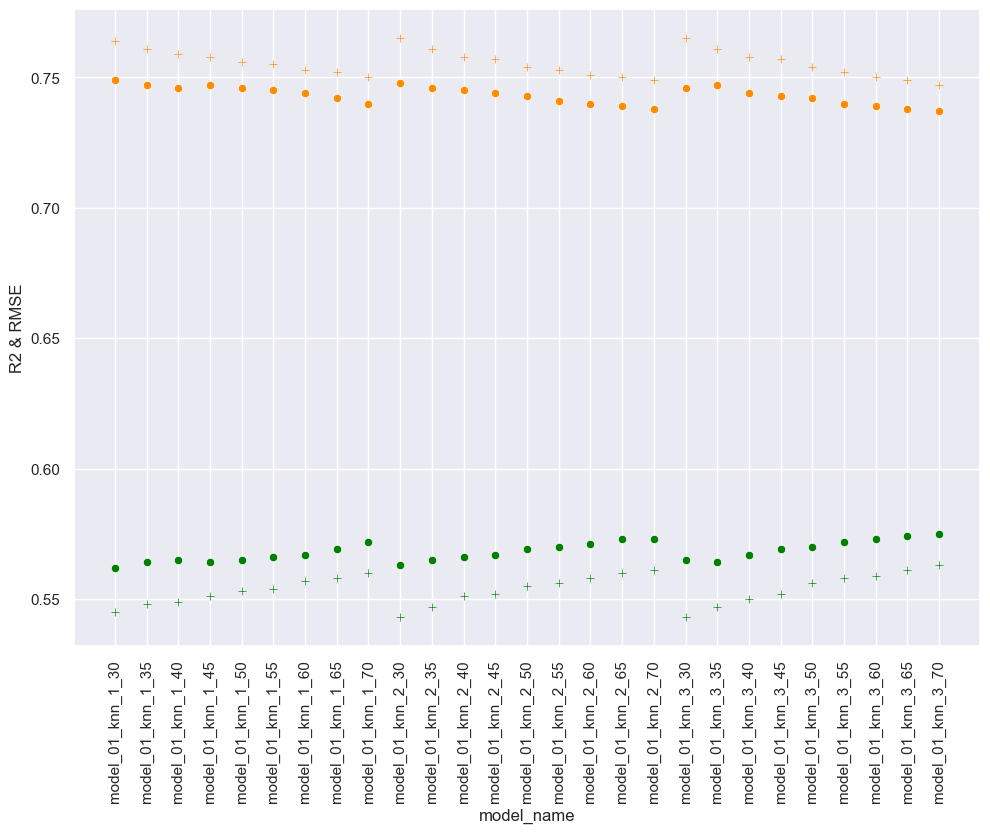

In [248]:
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = knn_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

scaling data

In [249]:
knn_cv_score_lst = []
count = 0
for pre_data in [[X_train, X_test], [X_train_scaled, X_test_scaled], [X_train_normalized, X_test_normalized]]:
    knn_scaled = KNeighborsRegressor(n_neighbors= 45, p = 1)
    cv_scores = cross_val_score(knn_scaled, pre_data[0], y_train, cv=5, n_jobs=-1)

    model_descrip = model_name + '_knn_scaler_'  + str(count)
    knn_cv_score_lst.append({'model_name': model_descrip,
                          'cv_score': round(cv_scores.mean(), 3)})
    
    count += 1

knn_cv_score_df = pd.DataFrame(knn_cv_score_lst)
knn_cv_score_df.sort_values(by = 'cv_score', ascending= False)

,model_name,cv_score
1,model_01_knn_scaler_1,0.742
2,model_01_knn_scaler_2,0.742
0,model_01_knn_scaler_0,0.724


Decision Tree Model

In [277]:
dtree = DecisionTreeRegressor(max_depth = 6, 
                            max_leaf_nodes = 12)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=12)

In [278]:
y_pred_dec_test = dtree.predict(X_test)
y_pred_dec_train = dtree.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)

print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

train_rmse  0.566
train_r2  0.745
test_rmse  0.6
test_r2  0.714


In [279]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

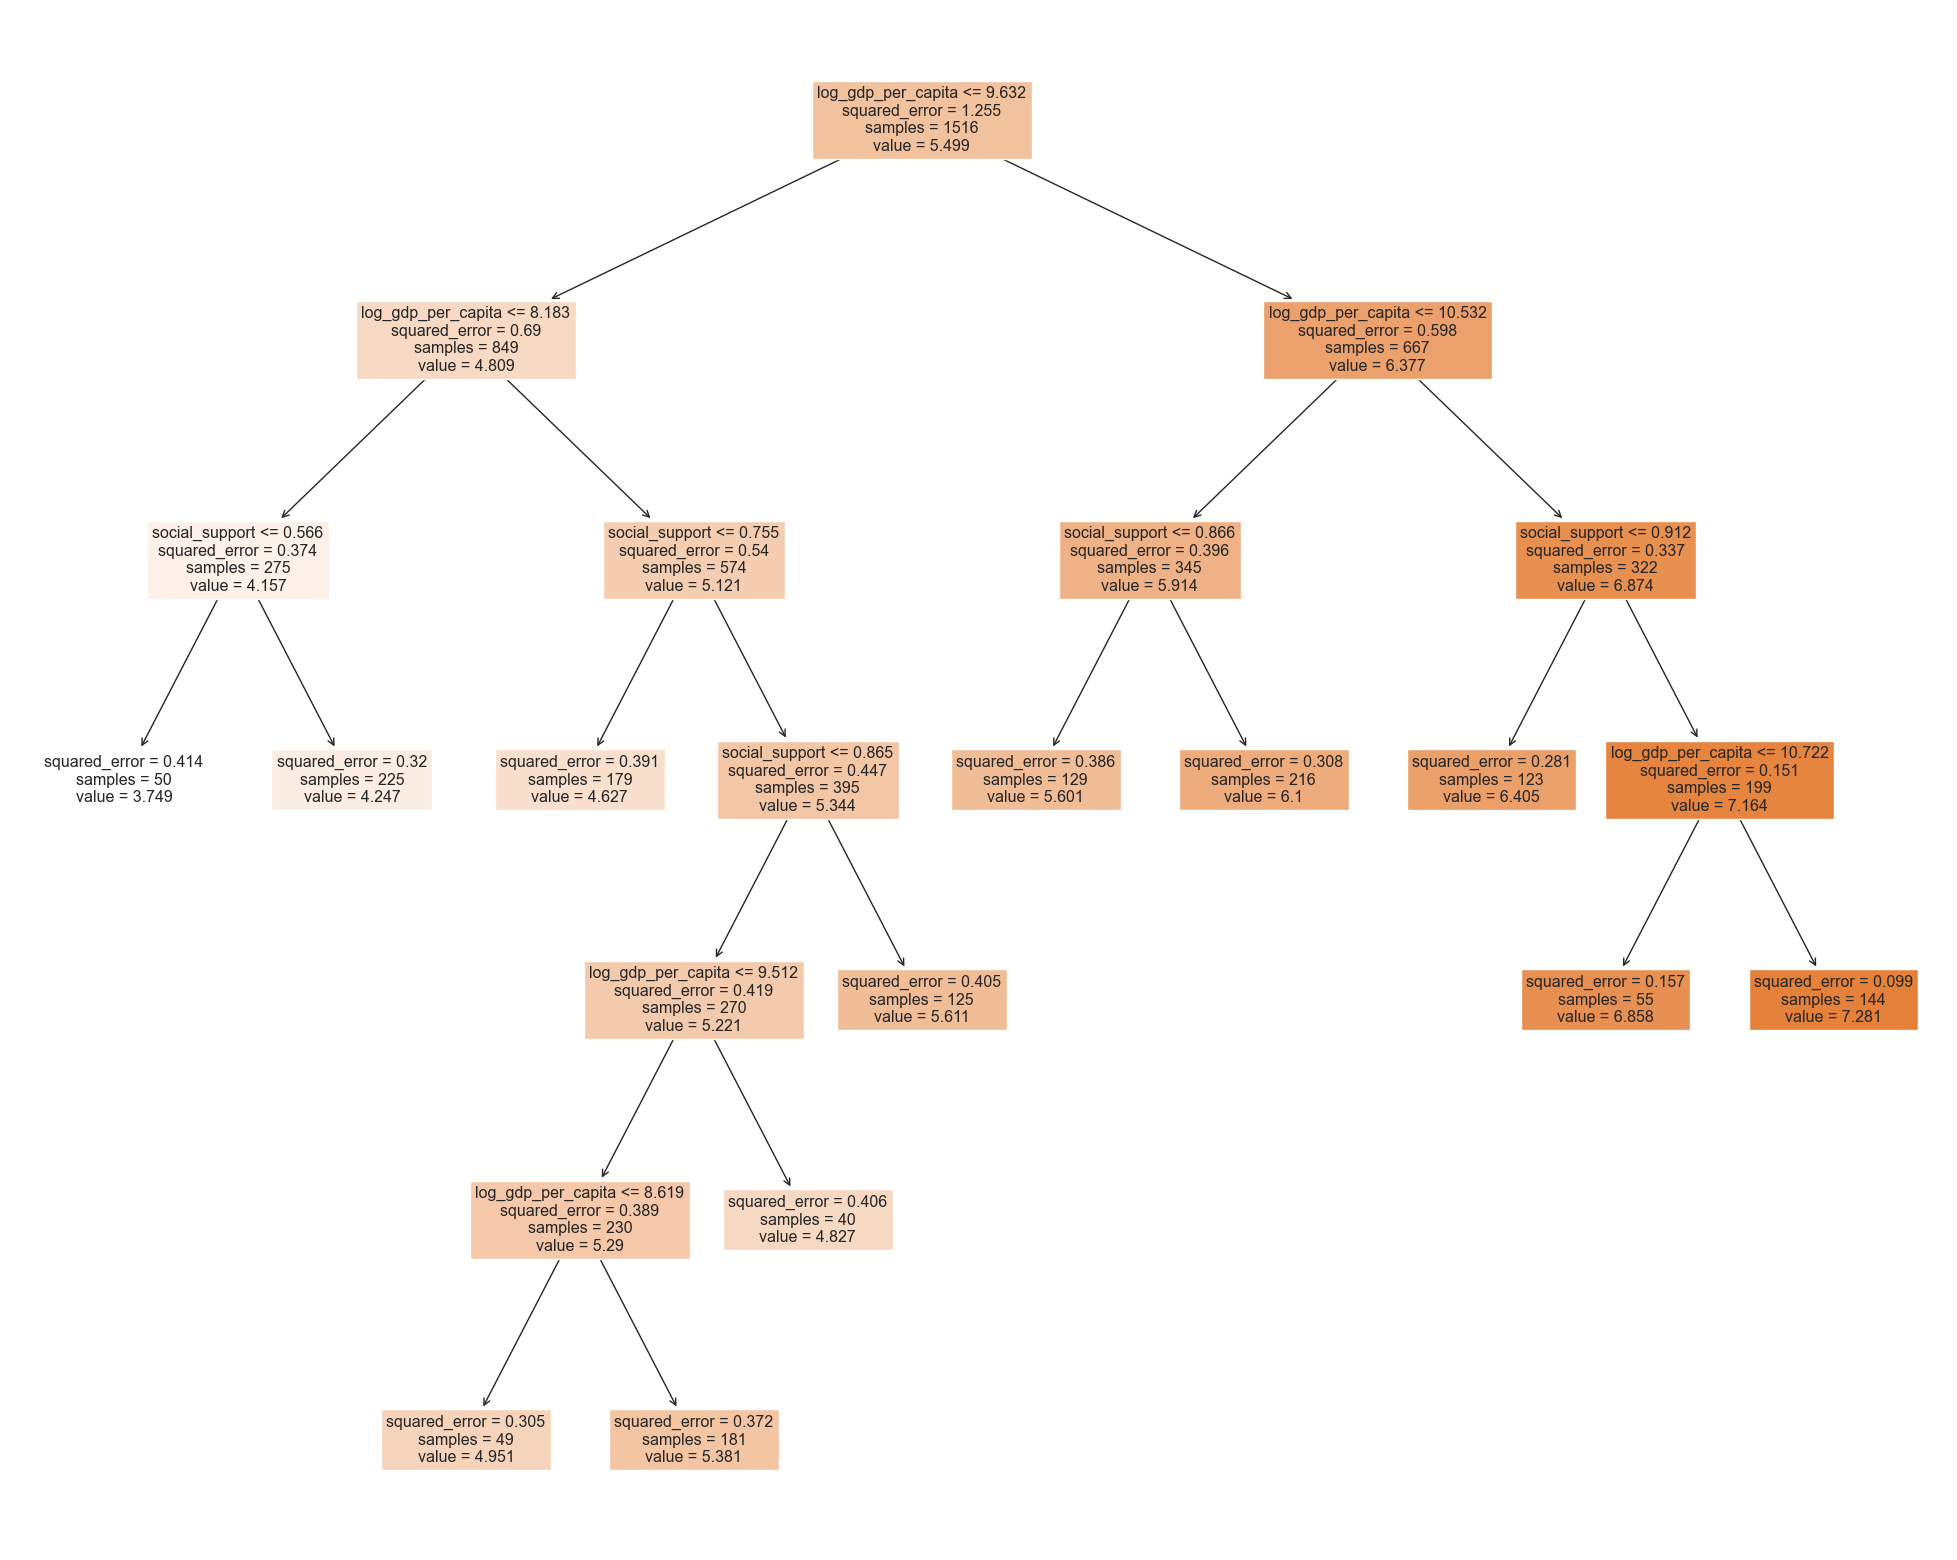

In [281]:
fig = plt.figure(figsize=(25,20))
dtree_plot = plot_tree(dtree, filled=True,
                       feature_names=X_train.columns)

In [290]:
dectree_error_lst = []
for depth in np.arange(6,7,1):
    for leaf in np.arange(6,13,1): 
        dectree = DecisionTreeRegressor(
                            max_depth = depth, 
                            max_leaf_nodes = leaf,
                            splitter = 'best')
        dectree.fit(X_train, y_train)
        y_pred_dec_test = dectree.predict(X_test)
        y_pred_dec_train = dectree.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_dec_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_dec_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_dec_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_dec_train, X_train).round(3)
        
        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_dectree_dep_' + str(depth) + '_max_leaf_' + str(leaf)
        dectree_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2})
        

dectree_error_df = pd.DataFrame(dectree_error_lst)
dectree_error_df.sort_values(by = ['delta_R2', 'test_r2'] , ascending=[True, False])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_01_dectree_dep_6_max_leaf_6,0.603,0.710,0.636,0.679,0.033,0.031
6,model_01_dectree_dep_6_max_leaf_12,0.566,0.745,0.600,0.714,0.034,0.031
5,model_01_dectree_dep_6_max_leaf_11,0.570,0.741,0.604,0.710,0.034,0.031
3,model_01_dectree_dep_6_max_leaf_9,0.578,0.733,0.612,0.702,0.034,0.031
2,model_01_dectree_dep_6_max_leaf_8,0.584,0.728,0.618,0.696,0.034,0.032
1,model_01_dectree_dep_6_max_leaf_7,0.591,0.721,0.626,0.689,0.035,0.032
4,model_01_dectree_dep_6_max_leaf_10,0.574,0.737,0.612,0.702,0.038,0.035


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_64427/3565193089.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


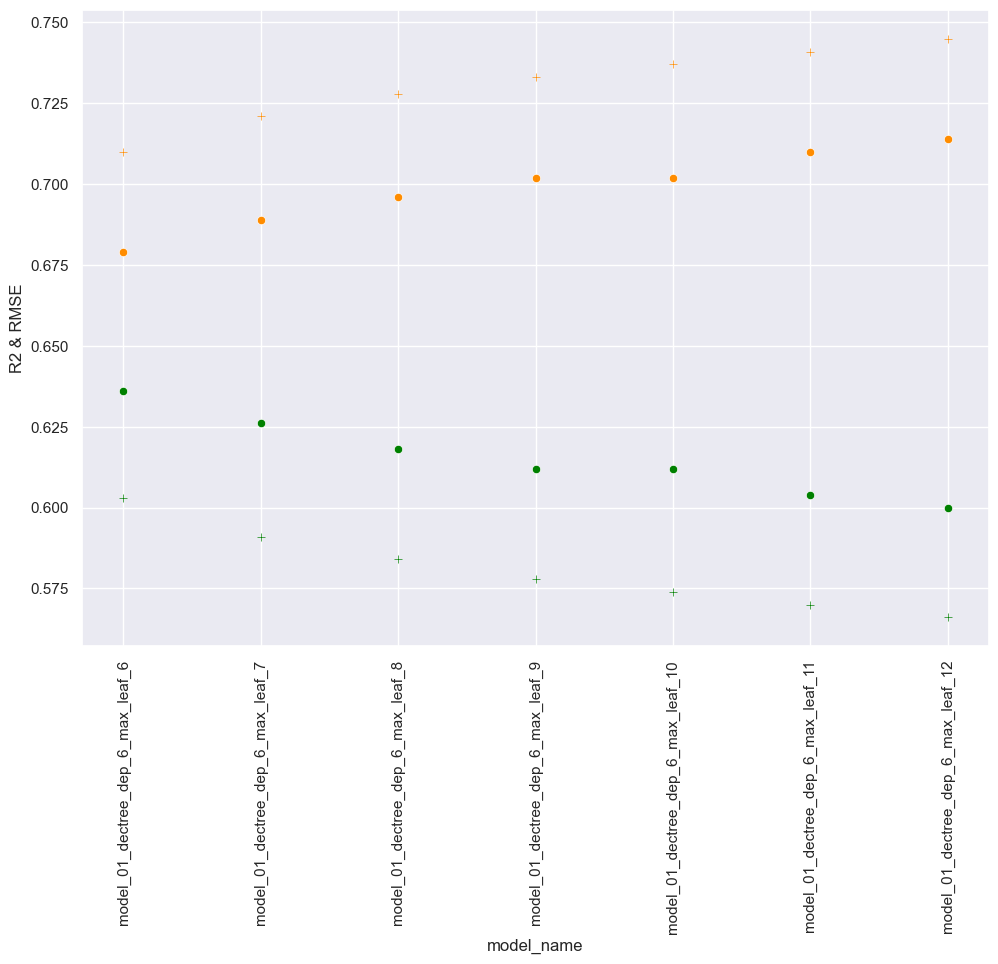

In [291]:
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = dectree_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

+ For this model max_depth = 6 and max_leaf_node = 12 is the optimum (low delta, hight r2)  
+ used in the further decision tree with the plot

Random Forest 

In [300]:
randforest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = 4,
                                max_leaf_nodes = 15,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
randforest.fit(X_train, y_train)

n_nodes = []
maximum_depths = []

# Stats about the trees in random forest
for tree_idx in randforest.estimators_:
    n_nodes.append(tree_idx.tree_.node_count)
    maximum_depths.append(tree_idx.tree_.max_depth)

y_pred_randforest_test = randforest.predict(X_test)
y_pred_randforest_train = randforest.predict(X_train)
rmse_test = mean_squared_error(y_test, y_pred_randforest_test, squared=False).round(3)
r2_test = adjusted_r2(y_test, y_pred_randforest_test, X_test).round(3)
rmse_train = mean_squared_error(y_train, y_pred_randforest_train, squared=False).round(3)
r2_train = adjusted_r2(y_train, y_pred_randforest_train, X_train).round(3)

print(f'Min number of nodes: {int(np.min(n_nodes))}')
print(f'Average number of nodes: {int(np.mean(n_nodes))}')
print(f'Max number of nodes: {int(np.max(n_nodes))}')
print(f'Min maximum depth: {int(np.min(maximum_depths))}')
print(f'Average maximum depth: {int(np.mean(maximum_depths))}')
print(f'Max maximum depth: {int(np.max(maximum_depths))}')
print(f'Number of Trees: {len(randforest.estimators_)}')
print('train_rmse ', rmse_train) 
print('train_r2 ', r2_train)
print('test_rmse ', rmse_test)
print('test_r2 ',r2_test)

Min number of nodes: 29
Average number of nodes: 29
Max number of nodes: 29
Min maximum depth: 4
Average maximum depth: 4
Max maximum depth: 4
Number of Trees: 100
train_rmse  0.548
train_r2  0.761
test_rmse  0.578
test_r2  0.734


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [284]:
randforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': 12,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [298]:
random_trees_error_lst = []
for tree_depth in np.arange(3,5,1):
    for tree_leaf in np.arange(10,30,5): 
        random_forest = RandomForestRegressor(n_estimators=100, 
                                random_state=123, 
                                max_depth = tree_depth,
                                max_leaf_nodes = tree_leaf,
                                max_features = 'sqrt',
                                n_jobs=-1, verbose = 1)
        random_forest.fit(X_train, y_train)
        
        y_pred_random_forest_test = random_forest.predict(X_test)
        y_pred_random_forest_train = random_forest.predict(X_train)
        rmse_test = mean_squared_error(y_test, y_pred_random_forest_test, squared=False).round(3)
        r2_test = adjusted_r2(y_test, y_pred_random_forest_test, X_test).round(3)
        rmse_train = mean_squared_error(y_train, y_pred_random_forest_train, squared=False).round(3)
        r2_train = adjusted_r2(y_train, y_pred_random_forest_train, X_train).round(3)
        
        n_nodes = []
        maximum_depths = []

        for tree_idx in random_forest.estimators_:
            n_nodes.append(tree_idx.tree_.node_count)
            maximum_depths.append(tree_idx.tree_.max_depth)
        
        mean_node_num = int(np.mean(n_nodes))
        mean_depth = int(np.mean(maximum_depths))
        num_of_trees = len(random_forest.estimators_)

        delta_rmse = abs(rmse_train - rmse_test)
        delta_r2 = abs(r2_train - r2_test)

        model_descrip = model_name + '_forest_tree_depth' + str(tree_depth) + '_max_leaf_' + str(tree_leaf)
        random_trees_error_lst.append({'model_name': model_descrip, 
                      'train_rmse': rmse_train, 
                      'train_r2':r2_train, 
                      'test_rmse': rmse_test, 
                      'test_r2':r2_test,
                      'delta_RMSE':delta_rmse,
                      'delta_R2':delta_r2,
                      'mean_node_num': mean_node_num,
                      'mean_depth': mean_depth,
                      'num_of_trees': num_of_trees})
        

random_trees_error_df = pd.DataFrame(random_trees_error_lst)
random_trees_error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_01_forest_tree_depth3_max_leaf_10,0.568,0.742,0.594,0.720,0.026,0.022,15,3,100
1,model_01_forest_tree_depth3_max_leaf_15,0.568,0.742,0.594,0.720,0.026,0.022,15,3,100
2,model_01_forest_tree_depth3_max_leaf_20,0.568,0.742,0.594,0.720,0.026,0.022,15,3,100
3,model_01_forest_tree_depth3_max_leaf_25,0.568,0.742,0.594,0.720,0.026,0.022,15,3,100
4,model_01_forest_tree_depth4_max_leaf_10,0.557,0.752,0.584,0.728,0.027,0.024,19,4,100
5,model_01_forest_tree_depth4_max_leaf_15,0.548,0.761,0.578,0.734,0.030,0.027,29,4,100
6,model_01_forest_tree_depth4_max_leaf_20,0.547,0.761,0.578,0.734,0.031,0.027,30,4,100
7,model_01_forest_tree_depth4_max_leaf_25,0.547,0.761,0.578,0.734,0.031,0.027,30,4,100


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_64427/3935140363.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


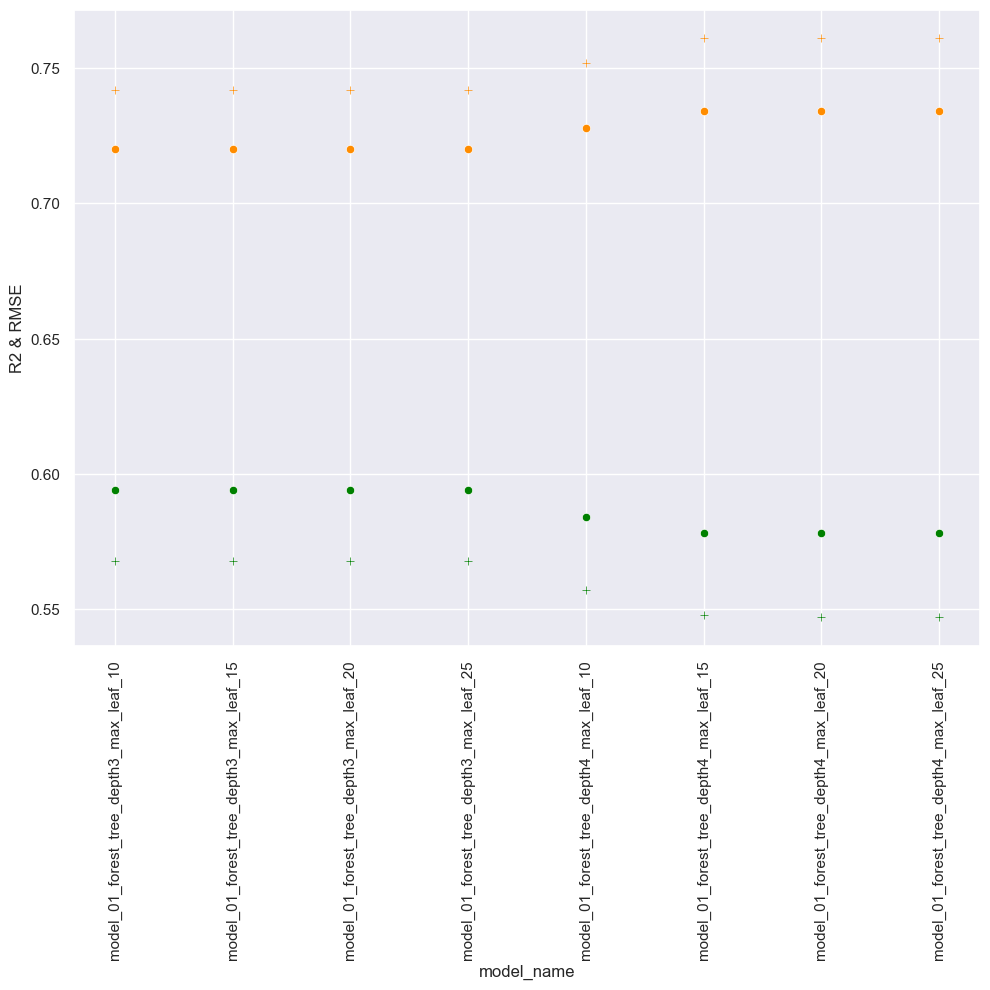

In [299]:
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = random_trees_error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();

Like in the decision tree model max_depth = 3 and max_leaf_node = 8 is the optimum, we can just choose this combination

Test: AdaBoostRegressor

In [303]:
ada = AdaBoostRegressor(n_estimators=50, random_state=8)
ada.fit(X_train, y_train)


y_pred_ada_test = ada.predict(X_test)
y_pred_ada_train = ada.predict(X_train)

ada_boost_error = pd.DataFrame([{'model_name': model_name + '_ada_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_ada_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_ada_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_ada_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_ada_test, X_test).round(3)}])

ada_boost_error['delta_RMSE'] = abs(ada_boost_error['train_rmse'] - ada_boost_error['test_rmse'])
ada_boost_error['delta_R2'] = abs(ada_boost_error['train_r2'] - ada_boost_error['test_r2'])
ada_boost_error

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_01_ada_boost,0.561,0.749,0.598,0.716,0.037,0.033


that is really nice!!

In [235]:
ada.get_params()

{'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': 8}

Test:  GradientBoostingRegressor

In [321]:
gbr = GradientBoostingRegressor(n_estimators=50,
                                criterion= 'squared_error',
                                max_depth = 6, 
                                max_leaf_nodes = 12,
                                random_state=8)
gbr.fit(X_train, y_train)


y_pred_gbr_test = gbr.predict(X_test)
y_pred_gbr_train = gbr.predict(X_train)

gbr_boost_error = pd.DataFrame([{'model_name': model_name + '_gbr_boost', 
                      'train_rmse': mean_squared_error(y_train, y_pred_gbr_train, squared=False).round(3), 
                      'train_r2':adjusted_r2(y_train, y_pred_gbr_train, X_train).round(3), 
                      'test_rmse': mean_squared_error(y_test, y_pred_gbr_test, squared=False).round(3), 
                      'test_r2':adjusted_r2(y_test, y_pred_gbr_test, X_test).round(3)}])

gbr_boost_error['delta_RMSE'] = abs(gbr_boost_error['train_rmse'] - gbr_boost_error['test_rmse'])
gbr_boost_error['delta_R2'] = abs(gbr_boost_error['train_r2'] - gbr_boost_error['test_r2'])
gbr_boost_error


,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_01_gbr_boost,0.483,0.814,0.56,0.751,0.077,0.063


In [237]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_iter_no_change': None,
 'random_state': 8,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Concat the optimal models of each algorithm to one big error_df:  
  
choose from the error_dfs the top models: 

In [306]:
part_lin_reg = lin_reg_error_df.sort_values(by =['delta_R2', 'test_r2'], ascending=[True, False]).iloc[:3]
part_lin_reg

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_01_lin_reg_1,0.634,0.679,0.643,0.671,0.009,0.008
5,model_01_lin_reg_6,0.572,0.739,0.583,0.730,0.011,0.009
3,model_01_lin_reg_4,0.593,0.719,0.606,0.708,0.013,0.011


In [307]:
part_knn = knn_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_knn

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
0,model_01_knn_1_30,0.545,0.764,0.562,0.749,0.017,0.015
9,model_01_knn_2_30,0.543,0.765,0.563,0.748,0.020,0.017
3,model_01_knn_1_45,0.551,0.758,0.564,0.747,0.013,0.011
1,model_01_knn_1_35,0.548,0.761,0.564,0.747,0.016,0.014
19,model_01_knn_3_35,0.547,0.761,0.564,0.747,0.017,0.014
4,model_01_knn_1_50,0.553,0.756,0.565,0.746,0.012,0.010


In [308]:
part_dec_tree = dectree_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:6]
part_dec_tree

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2
6,model_01_dectree_dep_6_max_leaf_12,0.566,0.745,0.600,0.714,0.034,0.031
5,model_01_dectree_dep_6_max_leaf_11,0.570,0.741,0.604,0.710,0.034,0.031
3,model_01_dectree_dep_6_max_leaf_9,0.578,0.733,0.612,0.702,0.034,0.031
4,model_01_dectree_dep_6_max_leaf_10,0.574,0.737,0.612,0.702,0.038,0.035
2,model_01_dectree_dep_6_max_leaf_8,0.584,0.728,0.618,0.696,0.034,0.032
1,model_01_dectree_dep_6_max_leaf_7,0.591,0.721,0.626,0.689,0.035,0.032


In [309]:
part_forest = random_trees_error_df.sort_values(by = ['test_r2', 'delta_R2'], ascending=[False, True]).iloc[:4]
part_forest

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
5,model_01_forest_tree_depth4_max_leaf_15,0.548,0.761,0.578,0.734,0.030,0.027,29,4,100
6,model_01_forest_tree_depth4_max_leaf_20,0.547,0.761,0.578,0.734,0.031,0.027,30,4,100
7,model_01_forest_tree_depth4_max_leaf_25,0.547,0.761,0.578,0.734,0.031,0.027,30,4,100
4,model_01_forest_tree_depth4_max_leaf_10,0.557,0.752,0.584,0.728,0.027,0.024,19,4,100


In [322]:
error_df = pd.concat([part_lin_reg, 
                      part_knn,
                      part_dec_tree,
                      part_forest,
                      ada_boost_error,
                      gbr_boost_error],  axis = 0)
                      
error_df.sort_values(by = ['delta_R2', 'test_r2'], ascending=[True, False])

,model_name,train_rmse,train_r2,test_rmse,test_r2,delta_RMSE,delta_R2,mean_node_num,mean_depth,num_of_trees
0,model_01_lin_reg_1,0.634,0.679,0.643,0.671,0.009,0.008,NaN,NaN,NaN
5,model_01_lin_reg_6,0.572,0.739,0.583,0.730,0.011,0.009,NaN,NaN,NaN
4,model_01_knn_1_50,0.553,0.756,0.565,0.746,0.012,0.010,NaN,NaN,NaN
3,model_01_knn_1_45,0.551,0.758,0.564,0.747,0.013,0.011,NaN,NaN,NaN
3,model_01_lin_reg_4,0.593,0.719,0.606,0.708,0.013,0.011,NaN,NaN,NaN
1,model_01_knn_1_35,0.548,0.761,0.564,0.747,0.016,0.014,NaN,NaN,NaN
19,model_01_knn_3_35,0.547,0.761,0.564,0.747,0.017,0.014,NaN,NaN,NaN
0,model_01_knn_1_30,0.545,0.764,0.562,0.749,0.017,0.015,NaN,NaN,NaN
9,model_01_knn_2_30,0.543,0.765,0.563,0.748,0.020,0.017,NaN,NaN,NaN
4,model_01_forest_tree_depth4_max_leaf_10,0.557,0.752,0.584,0.728,0.027,0.024,19.0,4.0,100.0


/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_64427/481243705.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


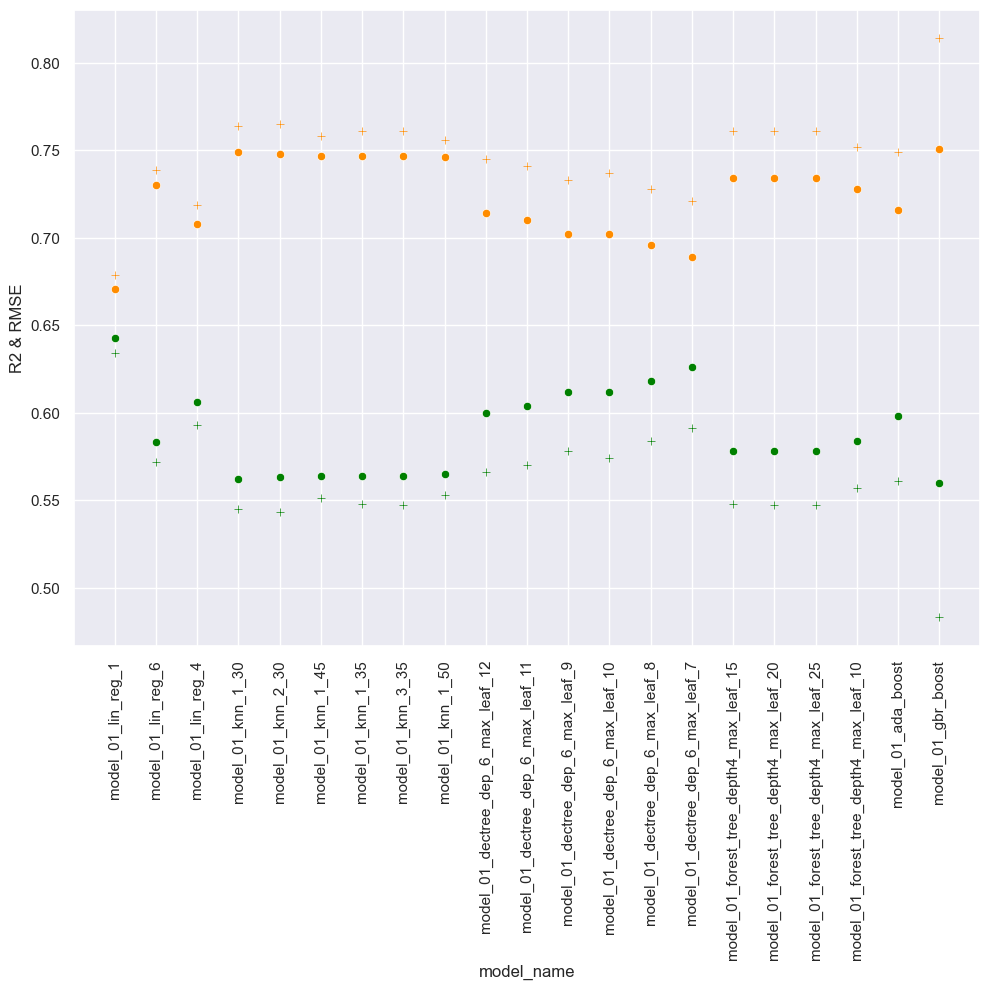

In [323]:
g=sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_r2', color = 'darkorange')
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'test_rmse', color = 'green')
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_r2', marker='+', color = 'darkorange')
g=sns.scatterplot(data = error_df, x = 'model_name', y = 'train_rmse', marker='+', color = 'green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel='R2 & RMSE')
plt.show();